In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import sqlalchemy as db
from sqlalchemy import *

In [2]:
engine = create_engine('postgresql://postgres:######################/09-Homework')
connection = engine.connect()

In [3]:
metadata = db.MetaData()
ave_salaries = db.Table('ave_salaries', metadata, autoload=True, autoload_with=engine)

In [4]:
#get Salary data from postgresql
query = db.select([ave_salaries])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()

In [19]:


#put postgresql data into a DataFrame
ave_salaries_df = pd.DataFrame(ResultSet)
ave_salaries_df.columns = ResultSet[0].keys()


ave_salaries_df['avgofsalary'] = ave_salaries_df['avgofsalary'].astype(np.int64)


objects = ave_salaries_df['title']
y_pos = np.arange(len(objects))
performance = ave_salaries_df['avgofsalary']

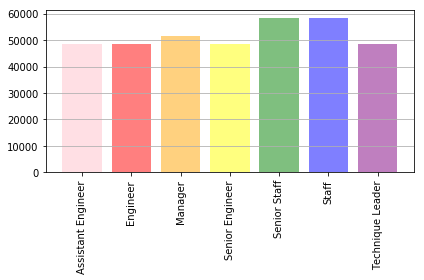

In [20]:
plt.bar(y_pos, performance , align='center', alpha=0.5, color=('pink', 'red','orange','yellow','green','blue','purple'))
plt.xticks(y_pos, objects, rotation=90)
plt.plot(figsize=(90,90))
plt.title = "Average Salary by Title"
plt.grid(axis = 'y')
plt.tight_layout()
plt.savefig('Salarybytitle.png')


plt.show()